In [ ]:
# Install Hugging Face's diffusers library
!pip install diffusers transformers

In [ ]:
# Import necessary libraries
import torch
from diffusers import DDPMScheduler, UNet2DModel
import matplotlib.pyplot as plt

# Load the pretrained diffusion model
model_id = "google/ddpm-cifar10-32"  # Pretrained DDPM on CIFAR-10 (32x32 images)
model = UNet2DModel.from_pretrained(model_id).to("cuda")

# Load the scheduler (controls the denoising steps)
scheduler = DDPMScheduler.from_config(model_id)



The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/699 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/143M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


scheduler_config.json:   0%|          | 0.00/256 [00:00<?, ?B/s]

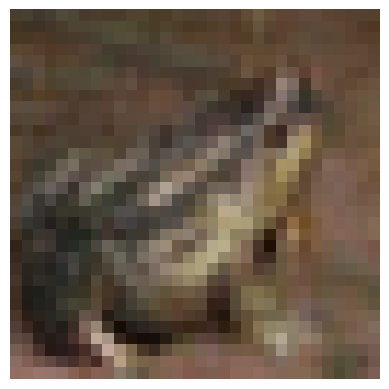

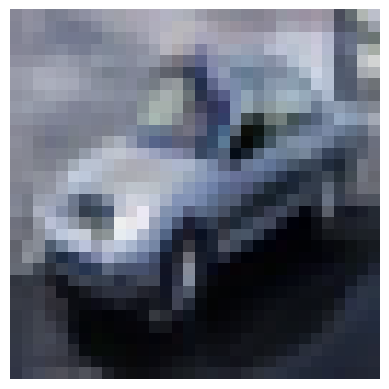

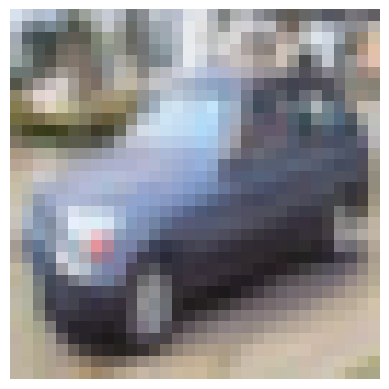

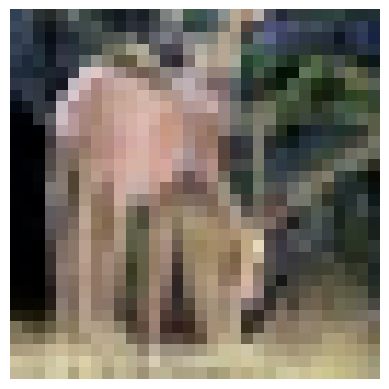

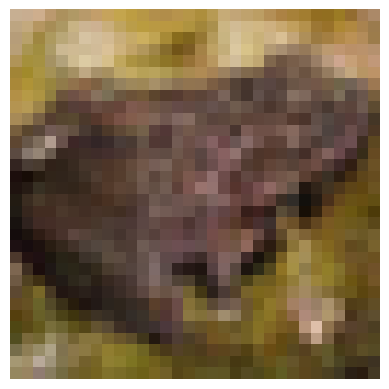

In [ ]:
# Function to generate images
def generate_images(num_samples=5, model=model, scheduler=scheduler):
    # Start with pure noise
    images = torch.randn((num_samples, 3, 32, 32)).to("cuda")
    scheduler.set_timesteps(1000)  # Set number of diffusion steps

    # Reverse the diffusion process
    for t in scheduler.timesteps:
        with torch.no_grad():
            # Predict the noise residual
            noise_pred = model(images, t).sample

        # Compute the previous noisy sample using the predicted noise
        images = scheduler.step(noise_pred, t, images).prev_sample

    # Scale images to [0, 1]
    images = (images.clamp(-1, 1) + 1) / 2
    return images

# Generate and plot images
generated_images = generate_images()
for i in range(len(generated_images)):
    plt.imshow(generated_images[i].permute(1, 2, 0).cpu().numpy())
    plt.axis("off")
    plt.show()

In [ ]:
from diffusers import StableDiffusionPipeline
# Load the pretrained Stable Diffusion model pipeline
model_id = "CompVis/stable-diffusion-v1-4"
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

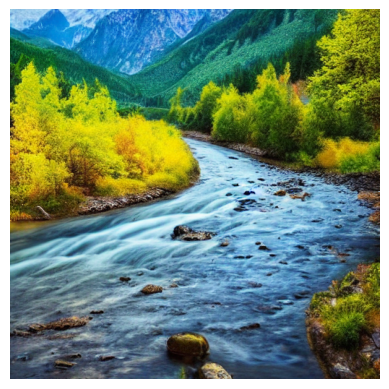

In [ ]:
#Function to generate images
def generate_images(prompt, num_samples=1, guidance_scale=7.5):
    """
    Generate images using Stable Diffusion.
    :param prompt: Text prompt for image generation
    :param num_samples: Number of images to generate
    :param guidance_scale: Scale for classifier-free guidance
    :return: List of generated images
    """
    images = pipe(prompt, num_inference_steps=50, guidance_scale=guidance_scale).images
    return images

# Generate and display images
prompt = "a beautiful landscape with mountains and rivers, vibrant colors"
generated_images = generate_images(prompt, num_samples=5)

# Plot the generated images
for i, img in enumerate(generated_images):
    plt.subplot(1, len(generated_images), i + 1)
    plt.imshow(img)
    plt.axis("off")
plt.show()